In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

import torch
import torch.nn as nn

import random
from tqdm import tqdm
import optuna

import pmdarima as pm

import datetime

In [5]:
df = pd.read_csv("../../preprocessed_data/[10분 단위]아파트_층별_소비전력_2023-03-16 06.30.00 ~ 2023-08-30 10.30.00.csv", usecols=[1,2,3,4])

df

,TIMESTAMP,BUILDING,FLOOR,CONSUMPTION(W)
0,2023-03-16 06:30:00,561,1,225
1,2023-03-16 06:40:00,561,1,217
2,2023-03-16 06:50:00,561,1,212
3,2023-03-16 07:00:00,561,1,88
4,2023-03-16 07:10:00,561,1,435
...,...,...,...,...
1588813,2023-08-30 09:50:00,563,24,366
1588814,2023-08-30 10:00:00,563,24,545
1588815,2023-08-30 10:10:00,563,24,567
1588816,2023-08-30 10:20:00,563,24,547


In [140]:
df.query("`BUILDING` == 561")['FLOOR'].drop_duplicates()

0          1
24073      2
48146      3
72219      4
96292      5
120365     6
144438     7
168511     8
192584     9
216657    10
240730    11
264803    12
288876    13
312949    14
337022    15
361095    16
385168    17
409241    18
Name: FLOOR, dtype: int64

In [141]:
df.query("`BUILDING` == 562")['FLOOR'].drop_duplicates()

433314     1
457387     2
481460     3
505533     4
529606     5
553679     6
577752     7
601825     8
625898     9
649971    10
674044    11
698117    12
722190    13
746263    14
770336    15
794409    16
818482    17
842555    18
866628    19
890701    20
914774    21
938847    22
962920    23
986993    24
Name: FLOOR, dtype: int64

In [142]:
df.query("`BUILDING` == 563")['FLOOR'].drop_duplicates()

1011066     1
1035139     2
1059212     3
1083285     4
1107358     5
1131431     6
1155504     7
1179577     8
1203650     9
1227723    10
1251796    11
1275869    12
1299942    13
1324015    14
1348088    15
1372161    16
1396234    17
1420307    18
1444380    19
1468453    20
1492526    21
1516599    22
1540672    23
1564745    24
Name: FLOOR, dtype: int64

In [6]:
df_561_1 = df.query("`BUILDING` == 561 and `FLOOR` == 1")

df_561_1['TIMESTAMP'] = pd.to_datetime(df_561_1['TIMESTAMP'])
df_561_1.set_index(df_561_1['TIMESTAMP'], drop=True, inplace=True)
df_561_1.drop(['BUILDING', 'FLOOR','TIMESTAMP'], axis=1, inplace=True)

df_561_1

C:\Users\hansung\AppData\Local\Temp\ipykernel_8840\4081689427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_1['TIMESTAMP'] = pd.to_datetime(df_561_1['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_8840\4081689427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_1.drop(['BUILDING', 'FLOOR','TIMESTAMP'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,225
2023-03-16 06:40:00,217
2023-03-16 06:50:00,212
2023-03-16 07:00:00,88
2023-03-16 07:10:00,435
...,...
2023-08-30 09:50:00,354
2023-08-30 10:00:00,354
2023-08-30 10:10:00,387


In [14]:
df_561_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24073 entries, 2023-03-16 06:30:00 to 2023-08-30 10:30:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CONSUMPTION(W)  24073 non-null  int64
dtypes: int64(1)
memory usage: 376.1 KB


In [19]:
df_561_2 = df.query("`BUILDING` == 561 and `FLOOR` == 2")

df_561_2['TIMESTAMP'] = pd.to_datetime(df_561_2['TIMESTAMP'])
df_561_2.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_2.set_index('TIMESTAMP', inplace=True)
df_561_2


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\2881861759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_2['TIMESTAMP'] = pd.to_datetime(df_561_2['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\2881861759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_2.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,256
2023-03-16 06:40:00,252
2023-03-16 06:50:00,237
2023-03-16 07:00:00,307
2023-03-16 07:10:00,304
...,...
2023-08-30 09:50:00,1244
2023-08-30 10:00:00,1309
2023-08-30 10:10:00,1233


In [20]:
df_561_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24073 entries, 2023-03-16 06:30:00 to 2023-08-30 10:30:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CONSUMPTION(W)  24073 non-null  int64
dtypes: int64(1)
memory usage: 376.1 KB


<Axes: xlabel='TIMESTAMP'>

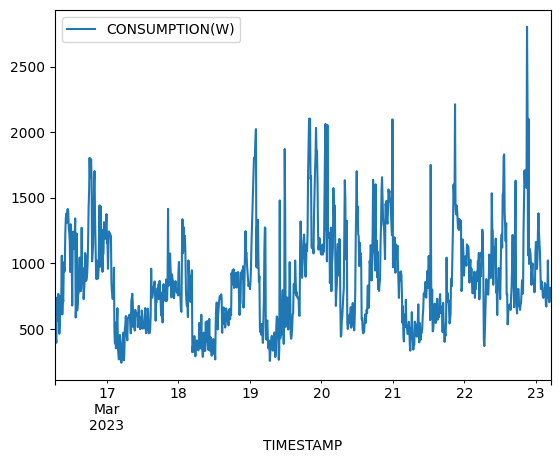

In [23]:
df_12 = df_561_1 + df_561_2

df_12.head(1000).plot()

In [50]:
df_561_3 = df.query("`BUILDING` == 561 and `FLOOR` == 3")

df_561_3['TIMESTAMP'] = pd.to_datetime(df_561_3['TIMESTAMP'])
df_561_3.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_3.set_index('TIMESTAMP', inplace=True)
df_561_3


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\1422401027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_3['TIMESTAMP'] = pd.to_datetime(df_561_3['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\1422401027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_3.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,264
2023-03-16 06:40:00,253
2023-03-16 06:50:00,135
2023-03-16 07:00:00,297
2023-03-16 07:10:00,271
...,...
2023-08-30 09:50:00,231
2023-08-30 10:00:00,229
2023-08-30 10:10:00,226


In [55]:
df_561_4 = df.query("`BUILDING` == 561 and `FLOOR` == 3")

df_561_4['TIMESTAMP'] = pd.to_datetime(df_561_4['TIMESTAMP'])
df_561_4.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_4.set_index('TIMESTAMP', inplace=True)
df_561_4


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\473771923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_4['TIMESTAMP'] = pd.to_datetime(df_561_4['TIMESTAMP'])
C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\473771923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_4.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,264
2023-03-16 06:40:00,253
2023-03-16 06:50:00,135
2023-03-16 07:00:00,297
2023-03-16 07:10:00,271
...,...
2023-08-30 09:50:00,231
2023-08-30 10:00:00,229
2023-08-30 10:10:00,226


<Axes: xlabel='TIMESTAMP'>

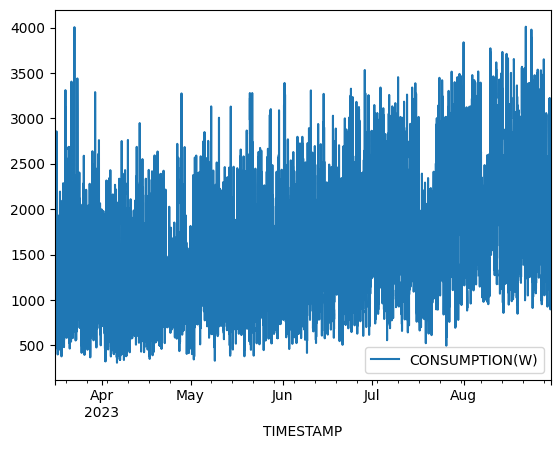

In [51]:
df_123 = df_12 + df_561_3
df_123.plot()

In [41]:
train_df = df_12.iloc[-1500:-100]
test_df = df_12.iloc[-100:]

train_df

,CONSUMPTION(W)
TIMESTAMP,
2023-08-20 00:40:00,1658
2023-08-20 00:50:00,1356
2023-08-20 01:00:00,1433
2023-08-20 01:10:00,1310
2023-08-20 01:20:00,1230
...,...
2023-08-29 17:10:00,1326
2023-08-29 17:20:00,1380
2023-08-29 17:30:00,1187


In [42]:
test_df

,CONSUMPTION(W)
TIMESTAMP,
2023-08-29 18:00:00,1191
2023-08-29 18:10:00,1339
2023-08-29 18:20:00,1334
2023-08-29 18:30:00,1260
2023-08-29 18:40:00,1039
...,...
2023-08-30 09:50:00,1598
2023-08-30 10:00:00,1663
2023-08-30 10:10:00,1620


In [8]:
def get_ndiff(train):
    kpss_diffs = pm.arima.ndiffs(train, alpha=0.05, test='kpss', max_d=6)
    adf_diffs = pm.arima.ndiffs(train, alpha=0.05, test='adf', max_d=6)
    return max(adf_diffs, kpss_diffs)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14205.250, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14343.750, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14246.946, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14215.666, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14341.751, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14205.383, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14204.861, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14204.237, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14207.884, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14234.043, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14202.217, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14213.670, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14244.946, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14202.871, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0

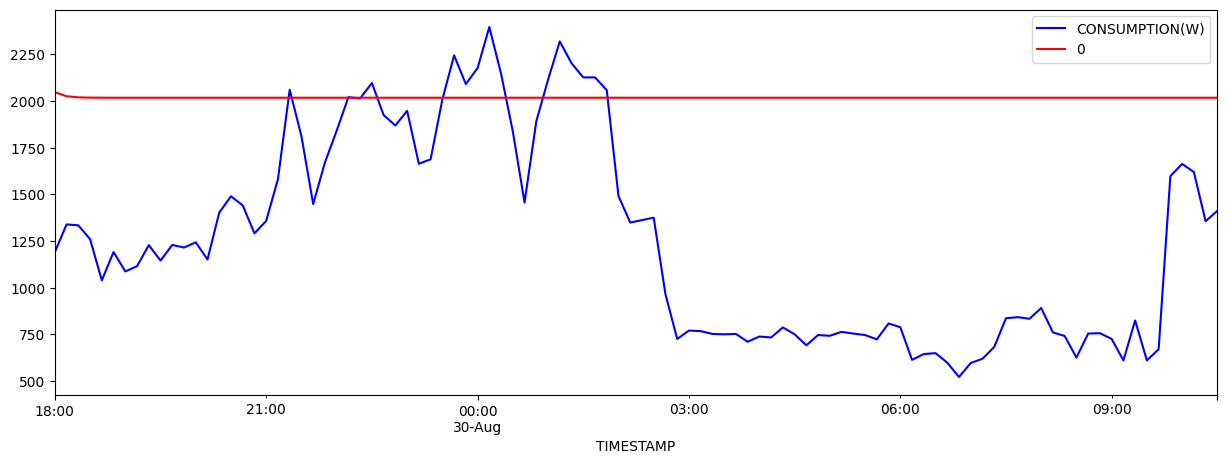

In [78]:
model = pm.auto_arima(df_123.iloc[-1100:-100], d = get_ndiff(train_df), seasonal=False, trace=True)

fcast2 = pd.DataFrame(model.predict(100))

fig, ax = plt.subplots(figsize=(15,5))
test_df.plot(ax=ax, color='blue', legend=True)
fcast2.plot(ax=ax, color='red', legend=True)

print(mean_absolute_percentage_error(df_123.iloc[-100:].values, fcast2.values))

In [45]:
df_561_1

,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,225
2023-03-16 06:40:00,217
2023-03-16 06:50:00,212
2023-03-16 07:00:00,88
2023-03-16 07:10:00,435
...,...
2023-08-30 09:50:00,354
2023-08-30 10:00:00,354
2023-08-30 10:10:00,387


<Axes: xlabel='TIMESTAMP'>

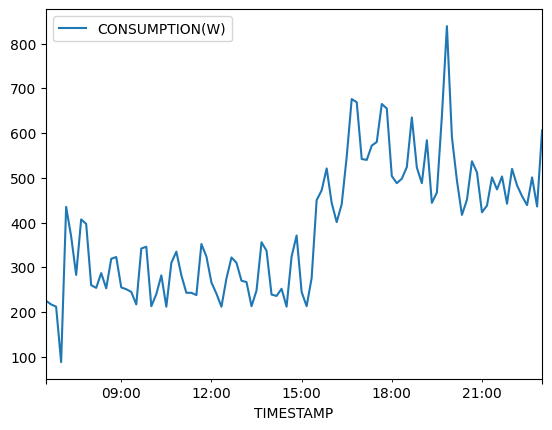

In [48]:
df_561_1.head(100).plot()

<Axes: xlabel='TIMESTAMP'>

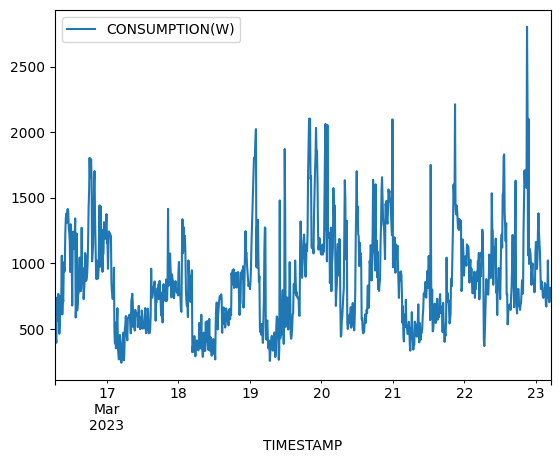

In [54]:
df_12.head(1000).plot()

<Axes: xlabel='TIMESTAMP'>

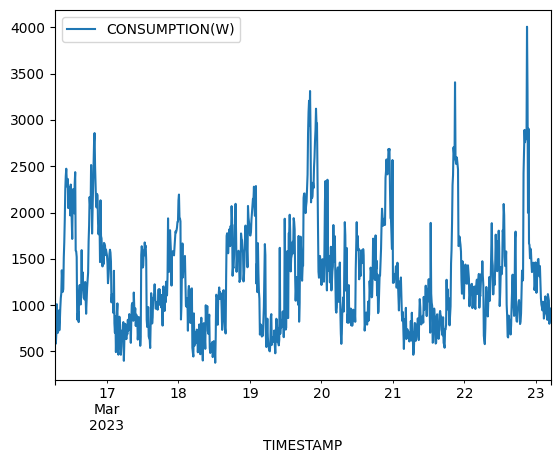

In [63]:
df_123.head(1000).plot()

<Axes: xlabel='TIMESTAMP'>

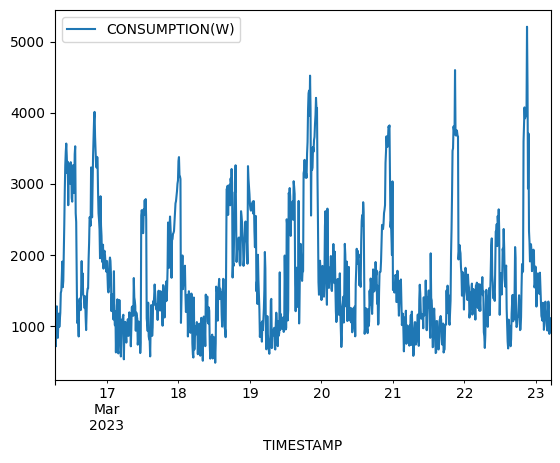

In [62]:
df_1234.head(1000).plot()

<Axes: xlabel='TIMESTAMP'>

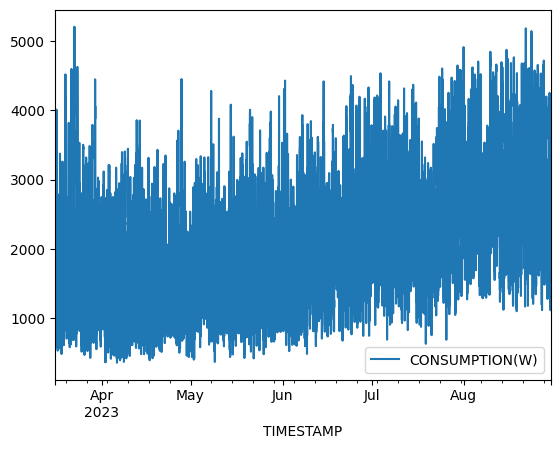

In [56]:
df_1234 = df_123 + df_561_4
df_1234.plot()

In [80]:
df_123.describe()

,CONSUMPTION(W)
count,24073.000000
mean,1559.940971
std,638.172641
min,308.000000
25%,1066.000000
50%,1460.000000
75%,1965.000000
max,4011.000000


In [127]:
df_12

,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,481
2023-03-16 06:40:00,469
2023-03-16 06:50:00,449
2023-03-16 07:00:00,395
2023-03-16 07:10:00,739
...,...
2023-08-30 09:50:00,1598
2023-08-30 10:00:00,1663
2023-08-30 10:10:00,1620


In [129]:
min_max_scaler = MinMaxScaler()

scaled_12 = min_max_scaler.fit_transform(df_12)

scaled_df_12 = pd.DataFrame(scaled_12,index=df_12.index)

scaled_df_12.describe()

,0
count,24073.000000
mean,0.334689
std,0.179014
min,0.000000
25%,0.199926
50%,0.295235
75%,0.444527
max,1.000000


<Axes: xlabel='TIMESTAMP'>

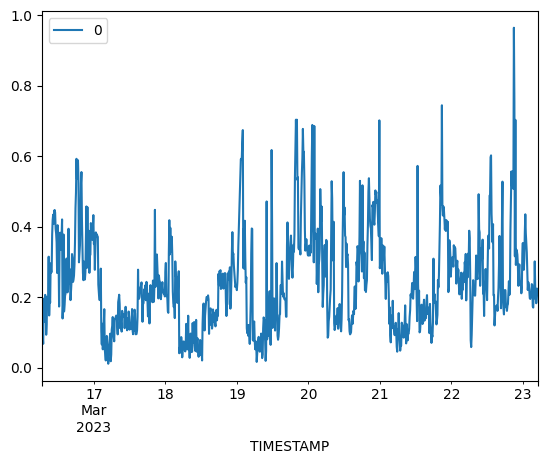

In [130]:
scaled_df_12.head(1000).plot()

<Axes: >

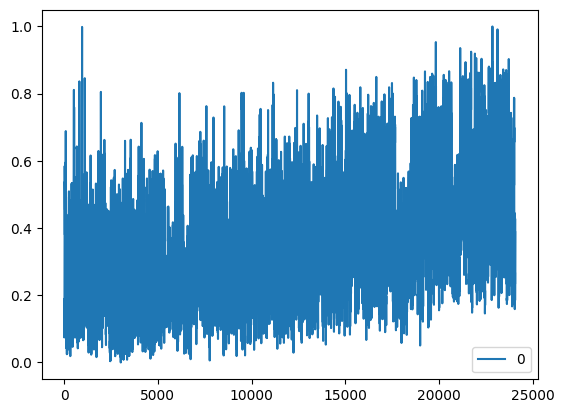

In [96]:
min_max_scaler = MinMaxScaler()

scaled_123 = min_max_scaler.fit_transform(df_123)

pd.DataFrame(scaled_123).plot()

In [100]:
scaled_df_123 = pd.DataFrame(scaled_123,index=df_123.index)

scaled_df_123.describe()

,0
count,24073.000000
mean,0.338088
std,0.172339
min,0.000000
25%,0.204699
50%,0.311099
75%,0.447475
max,1.000000


In [112]:
min_max_scaler = MinMaxScaler()

scaled_1234 = min_max_scaler.fit_transform(df_1234)

scaled_df_1234 = pd.DataFrame(scaled_1234,index=df_1234.index)

scaled_df_1234.describe()

,0
count,24073.000000
mean,0.339849
std,0.177941
min,0.000000
25%,0.200991
50%,0.313042
75%,0.451506
max,1.000000


100%|██████████| 72/72 [02:30<00:00,  2.08s/it]


Best window size for smallest MAPE is 390, then MAPE is 0.04385994420250345


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\447659158.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]


<Axes: >

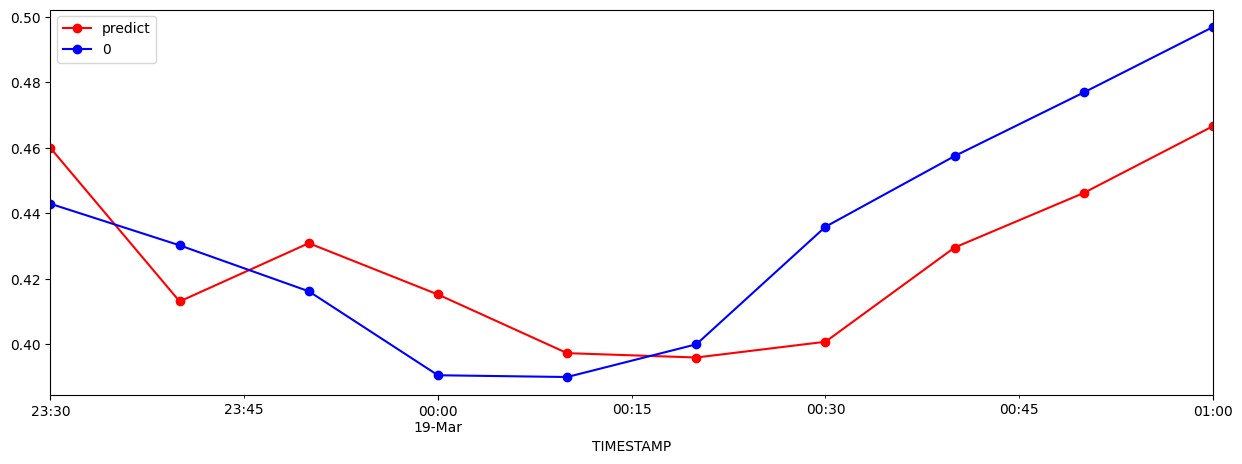

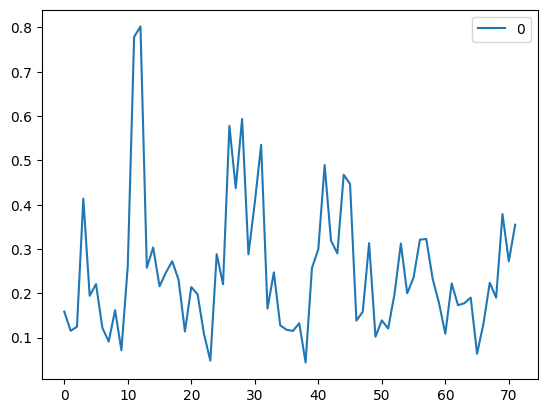

In [125]:
train_df = scaled_df_123
DAY_UNIT = 6 * 24

CHECK_SIZE = 10
min_mape = float('inf')
best_window_size = float('inf')

mapes = list()

MAX_STEP = 5*DAY_UNIT+1

with tqdm(range(10, MAX_STEP, 10)) as tr:
    for window_size in tr:
        end_time = train_df.index[0] + (window_size-1) * datetime.timedelta(minutes=10)
        train = train_df[:end_time]
        valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + (CHECK_SIZE+1) * datetime.timedelta(minutes=10)]

        model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

        fcast = []
        for row in valid.itertuples():
            fcast.extend(model.predict(n_periods=1))

            model.update(row[1])

        mape = mean_absolute_percentage_error(valid.values, fcast)
        mapes.append(mape)

        if mape < min_mape :
            min_mape = mape
            best_window_size = window_size


print(f'Best window size for smallest MAPE is {best_window_size}, then MAPE is {min_mape}')

end_time = train_df.index[0] + (best_window_size-1) * datetime.timedelta(minutes=10)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + CHECK_SIZE * datetime.timedelta(minutes=10)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

fcast = []
for row in valid.itertuples():
    f = model.predict(n_periods=1)[0]
    fcast.append(f)

    model.update(row[1])

mape = mean_absolute_percentage_error(valid.values, fcast)

fcast = pd.DataFrame({'predict':fcast}, index=valid.index)

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)    

pd.DataFrame(mapes).plot()

Best window size for smallest MAPE is 390, then MAPE is 0.04385994420250345


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\436229903.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]


0.04726163704063567


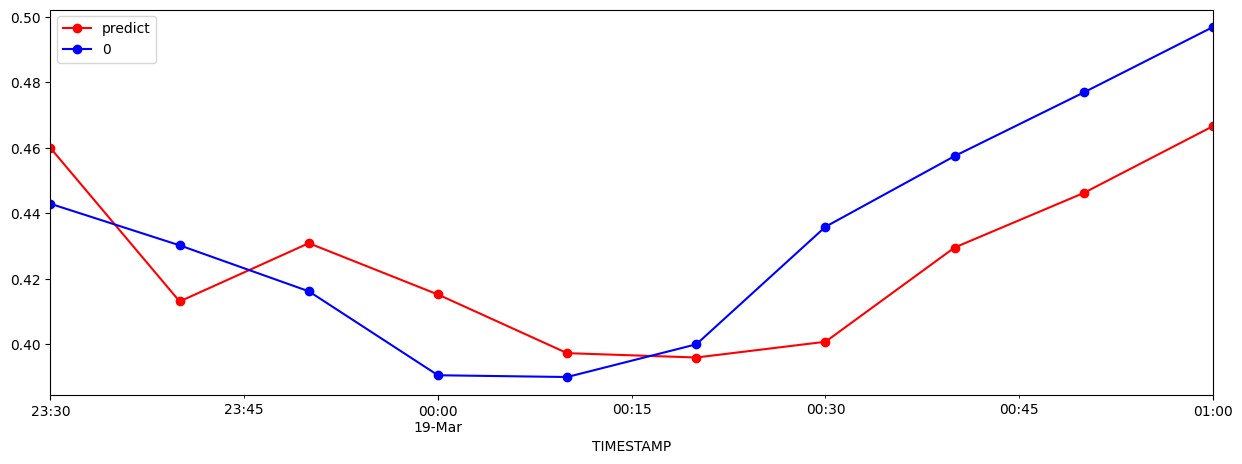

In [126]:
print(f'Best window size for smallest MAPE is {best_window_size}, then MAPE is {min_mape}')

end_time = train_df.index[0] + (best_window_size-1) * datetime.timedelta(minutes=10)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + CHECK_SIZE * datetime.timedelta(minutes=10)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=True)

fcast = []
for row in valid.itertuples():
    f = model.predict(n_periods=1)[0]
    fcast.append(f)

    model.update(row[1])

mape = mean_absolute_percentage_error(valid.values, fcast)

fcast = pd.DataFrame({'predict':fcast}, index=valid.index)

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)    

print(mape)

100%|██████████| 14/14 [00:39<00:00,  2.79s/it]


Best window size for smallest MAPE is 20, then MAPE is 0.165637070452343


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\2905607218.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]


<Axes: xlabel='TIMESTAMP'>

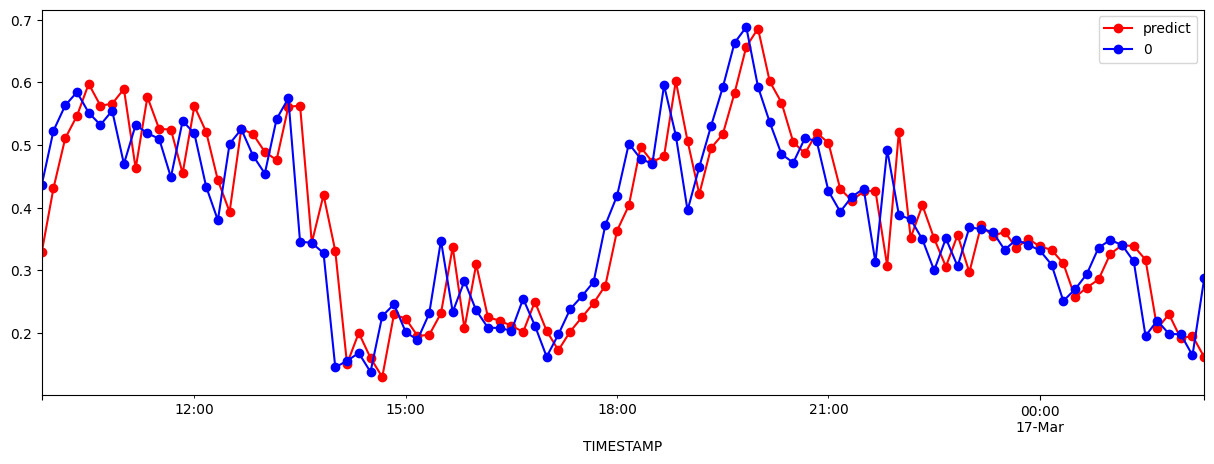

In [115]:
train_df = scaled_df_123
DAY_UNIT = 6 * 24

CHECK_SIZE = 100
min_mape = float('inf')
best_window_size = float('inf')

mapes = list()

MAX_STEP = 1*DAY_UNIT+1

with tqdm(range(10, MAX_STEP, 10)) as tr:
    for window_size in tr:
        end_time = train_df.index[0] + (window_size-1) * datetime.timedelta(minutes=10)
        train = train_df[:end_time]
        valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + (CHECK_SIZE+1) * datetime.timedelta(minutes=10)]

        model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

        fcast = []
        for row in valid.itertuples():
            fcast.extend(model.predict(n_periods=1))

            model.update(row[1])

        mape = mean_absolute_percentage_error(valid.values, fcast)
        mapes.append(mape)

        if mape < min_mape :
            min_mape = mape
            best_window_size = window_size


print(f'Best window size for smallest MAPE is {best_window_size}, then MAPE is {min_mape}')

end_time = train_df.index[0] + (best_window_size-1) * datetime.timedelta(minutes=10)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + CHECK_SIZE * datetime.timedelta(minutes=10)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

fcast = []
for row in valid.itertuples():
    f = model.predict(n_periods=1)[0]
    fcast.append(f)

    model.update(row[1])

mape = mean_absolute_percentage_error(valid.values, fcast)

fcast = pd.DataFrame({'predict':fcast}, index=valid.index)

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)    

In [133]:
import optuna
import gc

def objective(trial: optuna.Trial, train_df):
    DAY_UNIT = 6 * 24
    
    param = {
        # 'train_df' : trial.suggest_categorical('train_df', [scaled_df_12, scaled_df_123, scaled_df_1234]),
        'check_size': trial.suggest_int('check_size', 10, 100, 10),
        'window_size' : trial.suggest_int('window_size', 10, 5*DAY_UNIT, 10),
        'seasonal' : trial.suggest_categorical('seasonal', [True, False])
    }

    print(param)

    end_time = train_df.index[0] + (param['window_size']-1) * datetime.timedelta(minutes=10)
    train = train_df[:end_time]
    valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + param['check_size'] * datetime.timedelta(minutes=10)]

    model = pm.auto_arima(train, d=get_ndiff(train), seasonal=param['seasonal'])

    fcast = []
    for row in valid.itertuples():
        f = model.predict(n_periods=1)[0]
        fcast.append(f)

        model.update(row[1])

    mape = mean_absolute_percentage_error(valid.values, fcast)

    gc.collect()

    return mape

In [138]:
from optuna.samplers import TPESampler

study = optuna.create_study(direction='minimize', sampler=TPESampler())

study.optimize(lambda trial : objective(trial, scaled_df_12), n_trials = 100)

print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-11-12 17:13:42,940] A new study created in memory with name: no-name-20c654c3-14d3-4d7d-a580-699d0e98904f


{'check_size': 10, 'window_size': 10, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:43,533] Trial 0 finished with value: 0.3158326343345911 and parameters: {'check_size': 10, 'window_size': 10, 'seasonal': True}. Best is trial 0 with value: 0.3158326343345911.


{'check_size': 90, 'window_size': 410, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:47,487] Trial 1 finished with value: 0.4983717776204231 and parameters: {'check_size': 90, 'window_size': 410, 'seasonal': True}. Best is trial 0 with value: 0.3158326343345911.


{'check_size': 70, 'window_size': 300, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:50,212] Trial 2 finished with value: 0.2742615442960878 and parameters: {'check_size': 70, 'window_size': 300, 'seasonal': True}. Best is trial 2 with value: 0.2742615442960878.


{'check_size': 90, 'window_size': 660, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:55,207] Trial 3 finished with value: 0.24092608596290674 and parameters: {'check_size': 90, 'window_size': 660, 'seasonal': True}. Best is trial 3 with value: 0.24092608596290674.


{'check_size': 10, 'window_size': 420, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:56,956] Trial 4 finished with value: 0.7117128324065604 and parameters: {'check_size': 10, 'window_size': 420, 'seasonal': True}. Best is trial 3 with value: 0.24092608596290674.


{'check_size': 20, 'window_size': 370, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:58,842] Trial 5 finished with value: 0.16779651855205832 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': True}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 20, 'window_size': 10, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:13:59,464] Trial 6 finished with value: 0.19492481251783514 and parameters: {'check_size': 20, 'window_size': 10, 'seasonal': True}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 40, 'window_size': 130, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:01,310] Trial 7 finished with value: 0.39841191384498864 and parameters: {'check_size': 40, 'window_size': 130, 'seasonal': False}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 90, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:05,002] Trial 8 finished with value: 0.5098709263088087 and parameters: {'check_size': 90, 'window_size': 390, 'seasonal': False}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 100, 'window_size': 110, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:07,638] Trial 9 finished with value: 0.34851220385206344 and parameters: {'check_size': 100, 'window_size': 110, 'seasonal': True}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 40, 'window_size': 590, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:10,880] Trial 10 finished with value: 0.2482067651337682 and parameters: {'check_size': 40, 'window_size': 590, 'seasonal': False}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 30, 'window_size': 260, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:12,716] Trial 11 finished with value: 0.4778747116426538 and parameters: {'check_size': 30, 'window_size': 260, 'seasonal': True}. Best is trial 5 with value: 0.16779651855205832.


{'check_size': 20, 'window_size': 520, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:15,530] Trial 12 finished with value: 0.12408526291382242 and parameters: {'check_size': 20, 'window_size': 520, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 60, 'window_size': 520, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:19,376] Trial 13 finished with value: 0.22983800212214303 and parameters: {'check_size': 60, 'window_size': 520, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:21,870] Trial 14 finished with value: 0.14081907443563027 and parameters: {'check_size': 30, 'window_size': 480, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 530, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:25,342] Trial 15 finished with value: 0.21509424374242042 and parameters: {'check_size': 40, 'window_size': 530, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 50, 'window_size': 720, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:29,725] Trial 16 finished with value: 0.268356292481373 and parameters: {'check_size': 50, 'window_size': 720, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 490, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:32,212] Trial 17 finished with value: 0.17009035803188832 and parameters: {'check_size': 30, 'window_size': 490, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 570, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:34,873] Trial 18 finished with value: 0.3859280460883275 and parameters: {'check_size': 20, 'window_size': 570, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 60, 'window_size': 290, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:37,305] Trial 19 finished with value: 0.3677236933775071 and parameters: {'check_size': 60, 'window_size': 290, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 470, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:39,804] Trial 20 finished with value: 0.23491429968886107 and parameters: {'check_size': 30, 'window_size': 470, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 340, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:41,592] Trial 21 finished with value: 0.15814857978408065 and parameters: {'check_size': 20, 'window_size': 340, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 10, 'window_size': 210, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:43,146] Trial 22 finished with value: 0.22104403344401113 and parameters: {'check_size': 10, 'window_size': 210, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 630, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:45,924] Trial 23 finished with value: 0.2221587538064674 and parameters: {'check_size': 20, 'window_size': 630, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 470, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:48,408] Trial 24 finished with value: 0.23491429968886107 and parameters: {'check_size': 30, 'window_size': 470, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 50, 'window_size': 340, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:51,080] Trial 25 finished with value: 0.14536204165329025 and parameters: {'check_size': 50, 'window_size': 340, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 50, 'window_size': 440, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:53,958] Trial 26 finished with value: 0.49197915337034176 and parameters: {'check_size': 50, 'window_size': 440, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 50, 'window_size': 550, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:57,319] Trial 27 finished with value: 0.30361953335377295 and parameters: {'check_size': 50, 'window_size': 550, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 70, 'window_size': 210, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:14:59,895] Trial 28 finished with value: 0.2825501471749808 and parameters: {'check_size': 70, 'window_size': 210, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 340, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:02,288] Trial 29 finished with value: 0.13835029862648218 and parameters: {'check_size': 40, 'window_size': 340, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 10, 'window_size': 650, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:04,879] Trial 30 finished with value: 0.17199971997112326 and parameters: {'check_size': 10, 'window_size': 650, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 350, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:07,268] Trial 31 finished with value: 0.14087917639471065 and parameters: {'check_size': 40, 'window_size': 350, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 430, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:10,124] Trial 32 finished with value: 0.6424403343126415 and parameters: {'check_size': 40, 'window_size': 430, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 330, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:12,157] Trial 33 finished with value: 0.16761622877933116 and parameters: {'check_size': 30, 'window_size': 330, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 240, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:14,189] Trial 34 finished with value: 0.3554468644610761 and parameters: {'check_size': 40, 'window_size': 240, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 390, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:16,450] Trial 35 finished with value: 0.3094980057031156 and parameters: {'check_size': 30, 'window_size': 390, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 70, 'window_size': 500, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:20,862] Trial 36 finished with value: 0.19210676504529337 and parameters: {'check_size': 70, 'window_size': 500, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 60, 'window_size': 450, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:24,010] Trial 37 finished with value: 0.39163509213888587 and parameters: {'check_size': 60, 'window_size': 450, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 10, 'window_size': 590, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:26,317] Trial 38 finished with value: 0.2609452544911655 and parameters: {'check_size': 10, 'window_size': 590, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 290, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:28,380] Trial 39 finished with value: 0.46407039780621756 and parameters: {'check_size': 40, 'window_size': 290, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:30,451] Trial 40 finished with value: 0.20607313530647925 and parameters: {'check_size': 20, 'window_size': 390, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 50, 'window_size': 350, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:33,035] Trial 41 finished with value: 0.14121094142139964 and parameters: {'check_size': 50, 'window_size': 350, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 50, 'window_size': 320, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:35,528] Trial 42 finished with value: 0.2078648031572761 and parameters: {'check_size': 50, 'window_size': 320, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 350, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:37,929] Trial 43 finished with value: 0.14087917639471065 and parameters: {'check_size': 40, 'window_size': 350, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 380, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:40,240] Trial 44 finished with value: 0.2636804218192916 and parameters: {'check_size': 40, 'window_size': 380, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 270, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:42,128] Trial 45 finished with value: 0.559782144577135 and parameters: {'check_size': 30, 'window_size': 270, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 210, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:44,172] Trial 46 finished with value: 0.15809224913593684 and parameters: {'check_size': 40, 'window_size': 210, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 410, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:46,407] Trial 47 finished with value: 0.6010594104070446 and parameters: {'check_size': 20, 'window_size': 410, 'seasonal': True}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 360, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:48,584] Trial 48 finished with value: 0.13678303876953748 and parameters: {'check_size': 30, 'window_size': 360, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 140, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:50,287] Trial 49 finished with value: 0.20232723019546717 and parameters: {'check_size': 30, 'window_size': 140, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 410, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:52,529] Trial 50 finished with value: 0.6010594104070446 and parameters: {'check_size': 20, 'window_size': 410, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:54,893] Trial 51 finished with value: 0.1894947216177552 and parameters: {'check_size': 40, 'window_size': 370, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 310, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:15:56,940] Trial 52 finished with value: 0.3721405554373807 and parameters: {'check_size': 30, 'window_size': 310, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 500, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:00,054] Trial 53 finished with value: 0.1539215476141948 and parameters: {'check_size': 30, 'window_size': 500, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 40, 'window_size': 360, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:02,435] Trial 54 finished with value: 0.1382042031554249 and parameters: {'check_size': 40, 'window_size': 360, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 80, 'window_size': 460, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:06,050] Trial 55 finished with value: 0.2405100628564262 and parameters: {'check_size': 80, 'window_size': 460, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:08,960] Trial 56 finished with value: 0.12408526291382242 and parameters: {'check_size': 20, 'window_size': 520, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 10, 'window_size': 540, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:10,896] Trial 57 finished with value: 0.24734384880956767 and parameters: {'check_size': 10, 'window_size': 540, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 620, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:13,661] Trial 58 finished with value: 0.21738335195327138 and parameters: {'check_size': 20, 'window_size': 620, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 690, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:16,968] Trial 59 finished with value: 0.32226527945611066 and parameters: {'check_size': 20, 'window_size': 690, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 570, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:19,905] Trial 60 finished with value: 0.3447240893389915 and parameters: {'check_size': 30, 'window_size': 570, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 30, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:22,399] Trial 61 finished with value: 0.14081907443563027 and parameters: {'check_size': 30, 'window_size': 480, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:25,342] Trial 62 finished with value: 0.12408526291382242 and parameters: {'check_size': 20, 'window_size': 520, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 20, 'window_size': 500, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:28,128] Trial 63 finished with value: 0.1660413405956988 and parameters: {'check_size': 20, 'window_size': 500, 'seasonal': False}. Best is trial 12 with value: 0.12408526291382242.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:30,707] Trial 64 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 600, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:32,983] Trial 65 finished with value: 0.2513982345180209 and parameters: {'check_size': 10, 'window_size': 600, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 560, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:35,485] Trial 66 finished with value: 0.2259718737393043 and parameters: {'check_size': 10, 'window_size': 560, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 510, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:39,184] Trial 67 finished with value: 0.21408305989156856 and parameters: {'check_size': 10, 'window_size': 510, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 20, 'window_size': 530, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:42,186] Trial 68 finished with value: 0.18748421033219254 and parameters: {'check_size': 20, 'window_size': 530, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 100, 'window_size': 420, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:46,099] Trial 69 finished with value: 0.4320759236850782 and parameters: {'check_size': 100, 'window_size': 420, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 20, 'window_size': 440, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:48,305] Trial 70 finished with value: 0.6558706244328396 and parameters: {'check_size': 20, 'window_size': 440, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 20, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:50,553] Trial 71 finished with value: 0.15688029761542818 and parameters: {'check_size': 20, 'window_size': 480, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:53,167] Trial 72 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:55,786] Trial 73 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 530, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:16:58,490] Trial 74 finished with value: 0.12700129750245223 and parameters: {'check_size': 10, 'window_size': 530, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:01,124] Trial 75 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:03,755] Trial 76 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 580, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:07,032] Trial 77 finished with value: 0.37434705565704585 and parameters: {'check_size': 10, 'window_size': 580, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 610, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:09,518] Trial 78 finished with value: 0.23833754793387044 and parameters: {'check_size': 10, 'window_size': 610, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 550, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:11,758] Trial 79 finished with value: 0.25944282690325216 and parameters: {'check_size': 10, 'window_size': 550, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 640, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:14,273] Trial 80 finished with value: 0.2484158673669651 and parameters: {'check_size': 10, 'window_size': 640, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:16,896] Trial 81 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:19,516] Trial 82 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 550, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:21,743] Trial 83 finished with value: 0.25944282690325216 and parameters: {'check_size': 10, 'window_size': 550, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 460, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:23,658] Trial 84 finished with value: 0.6383517963987442 and parameters: {'check_size': 10, 'window_size': 460, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:26,274] Trial 85 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 570, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:28,649] Trial 86 finished with value: 0.39848698493806145 and parameters: {'check_size': 10, 'window_size': 570, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 490, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:30,727] Trial 87 finished with value: 0.18640781472834672 and parameters: {'check_size': 10, 'window_size': 490, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 540, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:32,693] Trial 88 finished with value: 0.24734384880956767 and parameters: {'check_size': 10, 'window_size': 540, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 590, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:35,026] Trial 89 finished with value: 0.2609452544911655 and parameters: {'check_size': 10, 'window_size': 590, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 510, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:38,792] Trial 90 finished with value: 0.21408305989156856 and parameters: {'check_size': 10, 'window_size': 510, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 20, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:41,663] Trial 91 finished with value: 0.12408526291382242 and parameters: {'check_size': 20, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 470, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:43,753] Trial 92 finished with value: 0.38952370523900004 and parameters: {'check_size': 10, 'window_size': 470, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 20, 'window_size': 560, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:46,522] Trial 93 finished with value: 0.3118945786675963 and parameters: {'check_size': 20, 'window_size': 560, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 490, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:48,602] Trial 94 finished with value: 0.18640781472834672 and parameters: {'check_size': 10, 'window_size': 490, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 520, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:51,225] Trial 95 finished with value: 0.12050483687494554 and parameters: {'check_size': 10, 'window_size': 520, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 540, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:53,162] Trial 96 finished with value: 0.24734384880956767 and parameters: {'check_size': 10, 'window_size': 540, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 20, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:54,363] Trial 97 finished with value: 0.1992638531579078 and parameters: {'check_size': 10, 'window_size': 20, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 450, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:56,353] Trial 98 finished with value: 0.9087063849252802 and parameters: {'check_size': 10, 'window_size': 450, 'seasonal': False}. Best is trial 64 with value: 0.12050483687494554.


{'check_size': 10, 'window_size': 670, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:17:58,928] Trial 99 finished with value: 0.06328243552029136 and parameters: {'check_size': 10, 'window_size': 670, 'seasonal': False}. Best is trial 99 with value: 0.06328243552029136.


Best trial : score 0.06328243552029136, 
params {'check_size': 10, 'window_size': 670, 'seasonal': False}


In [136]:
from optuna.samplers import TPESampler

study2 = optuna.create_study(direction='minimize', sampler=TPESampler())

study2.optimize(lambda trial : objective(trial, scaled_df_123), n_trials = 100)

print('Best trial : score {}, \nparams {}'.format(study2.best_trial.value, study2.best_trial.params))

[I 2023-11-12 17:02:23,886] A new study created in memory with name: no-name-9377370a-5ca5-4444-8385-32badcd973b5


{'check_size': 30, 'window_size': 400, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:25,994] Trial 0 finished with value: 0.36223950777843605 and parameters: {'check_size': 30, 'window_size': 400, 'seasonal': False}. Best is trial 0 with value: 0.36223950777843605.


{'check_size': 10, 'window_size': 540, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:28,949] Trial 1 finished with value: 0.27724779321448545 and parameters: {'check_size': 10, 'window_size': 540, 'seasonal': False}. Best is trial 1 with value: 0.27724779321448545.


{'check_size': 30, 'window_size': 560, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:32,367] Trial 2 finished with value: 0.3214590933346898 and parameters: {'check_size': 30, 'window_size': 560, 'seasonal': False}. Best is trial 1 with value: 0.27724779321448545.


{'check_size': 40, 'window_size': 580, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:40,194] Trial 3 finished with value: 0.2227833098058638 and parameters: {'check_size': 40, 'window_size': 580, 'seasonal': False}. Best is trial 3 with value: 0.2227833098058638.


{'check_size': 10, 'window_size': 10, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:41,373] Trial 4 finished with value: 0.14487509096640575 and parameters: {'check_size': 10, 'window_size': 10, 'seasonal': True}. Best is trial 4 with value: 0.14487509096640575.


{'check_size': 40, 'window_size': 40, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:43,801] Trial 5 finished with value: 0.25268842059522695 and parameters: {'check_size': 40, 'window_size': 40, 'seasonal': True}. Best is trial 4 with value: 0.14487509096640575.


{'check_size': 60, 'window_size': 210, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:44,802] Trial 6 finished with value: 0.19934997273261748 and parameters: {'check_size': 60, 'window_size': 210, 'seasonal': False}. Best is trial 4 with value: 0.14487509096640575.


{'check_size': 40, 'window_size': 170, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:46,462] Trial 7 finished with value: 0.23535589148142716 and parameters: {'check_size': 40, 'window_size': 170, 'seasonal': True}. Best is trial 4 with value: 0.14487509096640575.


{'check_size': 90, 'window_size': 170, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:48,970] Trial 8 finished with value: 0.2057426112097595 and parameters: {'check_size': 90, 'window_size': 170, 'seasonal': False}. Best is trial 4 with value: 0.14487509096640575.


{'check_size': 80, 'window_size': 60, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:50,532] Trial 9 finished with value: 0.30338643746429106 and parameters: {'check_size': 80, 'window_size': 60, 'seasonal': True}. Best is trial 4 with value: 0.14487509096640575.


{'check_size': 10, 'window_size': 360, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:52,055] Trial 10 finished with value: 0.1277152193404854 and parameters: {'check_size': 10, 'window_size': 360, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 720, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:02:59,003] Trial 11 finished with value: 0.38672518469203554 and parameters: {'check_size': 10, 'window_size': 720, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 310, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:00,666] Trial 12 finished with value: 0.41714781769021575 and parameters: {'check_size': 10, 'window_size': 310, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 60, 'window_size': 370, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:03,481] Trial 13 finished with value: 0.2279246641816476 and parameters: {'check_size': 60, 'window_size': 370, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 280, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:05,139] Trial 14 finished with value: 0.5560444942679112 and parameters: {'check_size': 20, 'window_size': 280, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 410, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:07,053] Trial 15 finished with value: 0.418338827448231 and parameters: {'check_size': 20, 'window_size': 410, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 100, 'window_size': 100, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:08,386] Trial 16 finished with value: 0.3414742485139606 and parameters: {'check_size': 100, 'window_size': 100, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 70, 'window_size': 10, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:10,550] Trial 17 finished with value: 0.1905864069032159 and parameters: {'check_size': 70, 'window_size': 10, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 460, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:13,659] Trial 18 finished with value: 0.3169642412903692 and parameters: {'check_size': 20, 'window_size': 460, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 50, 'window_size': 710, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:22,934] Trial 19 finished with value: 0.27084708125303686 and parameters: {'check_size': 50, 'window_size': 710, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 280, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:24,815] Trial 20 finished with value: 0.4701271718215392 and parameters: {'check_size': 30, 'window_size': 280, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 70, 'window_size': 20, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:26,822] Trial 21 finished with value: 0.1606648617469596 and parameters: {'check_size': 70, 'window_size': 20, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 70, 'window_size': 110, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:27,899] Trial 22 finished with value: 0.40163783491413463 and parameters: {'check_size': 70, 'window_size': 110, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 80, 'window_size': 220, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:30,126] Trial 23 finished with value: 0.3322968387047976 and parameters: {'check_size': 80, 'window_size': 220, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 50, 'window_size': 100, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:30,957] Trial 24 finished with value: 0.42244184422122655 and parameters: {'check_size': 50, 'window_size': 100, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 70, 'window_size': 150, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:34,954] Trial 25 finished with value: 0.254900280342552 and parameters: {'check_size': 70, 'window_size': 150, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 10, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:36,124] Trial 26 finished with value: 0.14487509096640575 and parameters: {'check_size': 10, 'window_size': 10, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 650, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:42,173] Trial 27 finished with value: 0.1998738075577373 and parameters: {'check_size': 10, 'window_size': 650, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 490, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:44,786] Trial 28 finished with value: 0.2173569485812532 and parameters: {'check_size': 20, 'window_size': 490, 'seasonal': True}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 70, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:46,819] Trial 29 finished with value: 0.14236884475886805 and parameters: {'check_size': 30, 'window_size': 70, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 230, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:48,158] Trial 30 finished with value: 0.15817792878112927 and parameters: {'check_size': 30, 'window_size': 230, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 70, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:49,882] Trial 31 finished with value: 0.1320230384665791 and parameters: {'check_size': 10, 'window_size': 70, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 80, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:51,846] Trial 32 finished with value: 0.15655520524441763 and parameters: {'check_size': 20, 'window_size': 80, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 130, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:54,264] Trial 33 finished with value: 0.8197172288996528 and parameters: {'check_size': 10, 'window_size': 130, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 80, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:56,505] Trial 34 finished with value: 0.13142482854802603 and parameters: {'check_size': 30, 'window_size': 80, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 320, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:03:58,558] Trial 35 finished with value: 0.3391160682122805 and parameters: {'check_size': 30, 'window_size': 320, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 60, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:01,955] Trial 36 finished with value: 0.16077892099344596 and parameters: {'check_size': 30, 'window_size': 60, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 40, 'window_size': 190, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:02,837] Trial 37 finished with value: 0.20192067180168155 and parameters: {'check_size': 40, 'window_size': 190, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 40, 'window_size': 600, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:08,422] Trial 38 finished with value: 0.17921675131089457 and parameters: {'check_size': 40, 'window_size': 600, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 530, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:10,673] Trial 39 finished with value: 0.24623886198901093 and parameters: {'check_size': 20, 'window_size': 530, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 30, 'window_size': 140, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:11,368] Trial 40 finished with value: 0.24967397665400945 and parameters: {'check_size': 30, 'window_size': 140, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 50, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:13,911] Trial 41 finished with value: 0.21265059170146014 and parameters: {'check_size': 10, 'window_size': 50, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 80, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:15,916] Trial 42 finished with value: 0.15655520524441763 and parameters: {'check_size': 20, 'window_size': 80, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 40, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:17,649] Trial 43 finished with value: 0.44146734023662326 and parameters: {'check_size': 10, 'window_size': 40, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 40, 'window_size': 250, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:19,668] Trial 44 finished with value: 0.39872572025145897 and parameters: {'check_size': 40, 'window_size': 250, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 150, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:22,079] Trial 45 finished with value: 0.3268095875262351 and parameters: {'check_size': 10, 'window_size': 150, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 50, 'window_size': 180, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:22,905] Trial 46 finished with value: 0.21995531954217384 and parameters: {'check_size': 50, 'window_size': 180, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 20, 'window_size': 420, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:25,395] Trial 47 finished with value: 0.42749140178011125 and parameters: {'check_size': 20, 'window_size': 420, 'seasonal': False}. Best is trial 10 with value: 0.1277152193404854.


{'check_size': 10, 'window_size': 80, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:27,100] Trial 48 finished with value: 0.09261832105484319 and parameters: {'check_size': 10, 'window_size': 80, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 120, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:27,661] Trial 49 finished with value: 0.808521608747031 and parameters: {'check_size': 20, 'window_size': 120, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 30, 'window_size': 350, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:29,824] Trial 50 finished with value: 0.11633131368147098 and parameters: {'check_size': 30, 'window_size': 350, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 30, 'window_size': 340, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:32,104] Trial 51 finished with value: 0.17422292608467363 and parameters: {'check_size': 30, 'window_size': 340, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 40, 'window_size': 460, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:35,740] Trial 52 finished with value: 0.28591633885134754 and parameters: {'check_size': 40, 'window_size': 460, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 30, 'window_size': 360, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:37,627] Trial 53 finished with value: 0.1203211647488042 and parameters: {'check_size': 30, 'window_size': 360, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:39,511] Trial 54 finished with value: 0.09451925631528084 and parameters: {'check_size': 20, 'window_size': 380, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:41,480] Trial 55 finished with value: 0.1166237867621009 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:43,375] Trial 56 finished with value: 0.14866411595215964 and parameters: {'check_size': 20, 'window_size': 390, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 360, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:45,152] Trial 57 finished with value: 0.10963760729144645 and parameters: {'check_size': 20, 'window_size': 360, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:47,186] Trial 58 finished with value: 0.1166237867621009 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 430, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:49,372] Trial 59 finished with value: 0.31612117634908554 and parameters: {'check_size': 20, 'window_size': 430, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 290, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:51,151] Trial 60 finished with value: 0.46524324054077315 and parameters: {'check_size': 20, 'window_size': 290, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 30, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:53,394] Trial 61 finished with value: 0.14636878664211528 and parameters: {'check_size': 30, 'window_size': 380, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:55,341] Trial 62 finished with value: 0.1166237867621009 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 10, 'window_size': 330, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:57,170] Trial 63 finished with value: 0.17321379575859644 and parameters: {'check_size': 10, 'window_size': 330, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 450, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:04:59,869] Trial 64 finished with value: 0.4851964182502204 and parameters: {'check_size': 20, 'window_size': 450, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 10, 'window_size': 350, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:01,523] Trial 65 finished with value: 0.12962750071228182 and parameters: {'check_size': 10, 'window_size': 350, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 490, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:04,175] Trial 66 finished with value: 0.2173569485812532 and parameters: {'check_size': 20, 'window_size': 490, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 260, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:05,752] Trial 67 finished with value: 0.4013860051927593 and parameters: {'check_size': 20, 'window_size': 260, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 10, 'window_size': 300, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:07,169] Trial 68 finished with value: 0.2983011605015635 and parameters: {'check_size': 10, 'window_size': 300, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 20, 'window_size': 400, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:09,022] Trial 69 finished with value: 0.27552015368271265 and parameters: {'check_size': 20, 'window_size': 400, 'seasonal': False}. Best is trial 48 with value: 0.09261832105484319.


{'check_size': 10, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:10,774] Trial 70 finished with value: 0.09155856061794673 and parameters: {'check_size': 10, 'window_size': 370, 'seasonal': False}. Best is trial 70 with value: 0.09155856061794673.


{'check_size': 10, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:12,501] Trial 71 finished with value: 0.09155856061794673 and parameters: {'check_size': 10, 'window_size': 370, 'seasonal': False}. Best is trial 70 with value: 0.09155856061794673.


{'check_size': 10, 'window_size': 440, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:15,007] Trial 72 finished with value: 0.2951889316176941 and parameters: {'check_size': 10, 'window_size': 440, 'seasonal': False}. Best is trial 70 with value: 0.09155856061794673.


{'check_size': 10, 'window_size': 410, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:16,691] Trial 73 finished with value: 0.3009238641855019 and parameters: {'check_size': 10, 'window_size': 410, 'seasonal': False}. Best is trial 70 with value: 0.09155856061794673.


{'check_size': 10, 'window_size': 320, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:18,341] Trial 74 finished with value: 0.5825253556739385 and parameters: {'check_size': 10, 'window_size': 320, 'seasonal': False}. Best is trial 70 with value: 0.09155856061794673.


{'check_size': 10, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:20,703] Trial 75 finished with value: 0.15968689121017215 and parameters: {'check_size': 10, 'window_size': 480, 'seasonal': False}. Best is trial 70 with value: 0.09155856061794673.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:22,324] Trial 76 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:23,935] Trial 77 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 400, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:25,601] Trial 78 finished with value: 0.2500422928992751 and parameters: {'check_size': 10, 'window_size': 400, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 530, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:27,525] Trial 79 finished with value: 0.2076322824836999 and parameters: {'check_size': 10, 'window_size': 530, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 340, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:29,427] Trial 80 finished with value: 0.2643765346759469 and parameters: {'check_size': 10, 'window_size': 340, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 100, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:33,502] Trial 81 finished with value: 0.3059706472783646 and parameters: {'check_size': 100, 'window_size': 380, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 310, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:35,222] Trial 82 finished with value: 0.41714781769021575 and parameters: {'check_size': 10, 'window_size': 310, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 20, 'window_size': 420, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:37,778] Trial 83 finished with value: 0.42749140178011125 and parameters: {'check_size': 20, 'window_size': 420, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:39,355] Trial 84 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 350, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:41,042] Trial 85 finished with value: 0.12962750071228182 and parameters: {'check_size': 10, 'window_size': 350, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 270, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:42,350] Trial 86 finished with value: 0.5663142285564033 and parameters: {'check_size': 10, 'window_size': 270, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 60, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:45,339] Trial 87 finished with value: 0.29435625452703845 and parameters: {'check_size': 60, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 510, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:47,768] Trial 88 finished with value: 0.14586354534674473 and parameters: {'check_size': 10, 'window_size': 510, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 90, 'window_size': 460, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:52,969] Trial 89 finished with value: 0.21690769353933068 and parameters: {'check_size': 90, 'window_size': 460, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 430, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:54,831] Trial 90 finished with value: 0.34251005475799373 and parameters: {'check_size': 10, 'window_size': 430, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 20, 'window_size': 360, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:56,559] Trial 91 finished with value: 0.10963760729144645 and parameters: {'check_size': 20, 'window_size': 360, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 350, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:05:58,194] Trial 92 finished with value: 0.12962750071228182 and parameters: {'check_size': 10, 'window_size': 350, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 20, 'window_size': 330, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:00,326] Trial 93 finished with value: 0.21888003073766776 and parameters: {'check_size': 20, 'window_size': 330, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 20, 'window_size': 410, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:02,258] Trial 94 finished with value: 0.418338827448231 and parameters: {'check_size': 20, 'window_size': 410, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:03,893] Trial 95 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 580, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:09,596] Trial 96 finished with value: 0.3535763882427325 and parameters: {'check_size': 10, 'window_size': 580, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:11,196] Trial 97 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:12,810] Trial 98 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:14,411] Trial 99 finished with value: 0.04726163704063567 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 76 with value: 0.04726163704063567.


Best trial : score 0.04726163704063567, 
params {'check_size': 10, 'window_size': 390, 'seasonal': False}


In [137]:
from optuna.samplers import TPESampler

study3 = optuna.create_study(direction='minimize', sampler=TPESampler())

study3.optimize(lambda trial : objective(trial, scaled_df_1234), n_trials = 100)

print('Best trial : score {}, \nparams {}'.format(study3.best_trial.value, study3.best_trial.params))

[I 2023-11-12 17:06:14,427] A new study created in memory with name: no-name-53d7a256-612a-45d8-892a-10e158a03f58


{'check_size': 20, 'window_size': 570, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:18,272] Trial 0 finished with value: 0.3575175471580488 and parameters: {'check_size': 20, 'window_size': 570, 'seasonal': False}. Best is trial 0 with value: 0.3575175471580488.


{'check_size': 20, 'window_size': 420, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:19,586] Trial 1 finished with value: 0.46109275809350425 and parameters: {'check_size': 20, 'window_size': 420, 'seasonal': True}. Best is trial 0 with value: 0.3575175471580488.


{'check_size': 80, 'window_size': 300, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:26,279] Trial 2 finished with value: 0.31751918509260835 and parameters: {'check_size': 80, 'window_size': 300, 'seasonal': True}. Best is trial 2 with value: 0.31751918509260835.


{'check_size': 60, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:31,598] Trial 3 finished with value: 0.2134455009895295 and parameters: {'check_size': 60, 'window_size': 480, 'seasonal': False}. Best is trial 3 with value: 0.2134455009895295.


{'check_size': 80, 'window_size': 20, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:35,353] Trial 4 finished with value: 0.46730986275978587 and parameters: {'check_size': 80, 'window_size': 20, 'seasonal': True}. Best is trial 3 with value: 0.2134455009895295.


{'check_size': 100, 'window_size': 190, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:36,936] Trial 5 finished with value: 0.29039292823384655 and parameters: {'check_size': 100, 'window_size': 190, 'seasonal': True}. Best is trial 3 with value: 0.2134455009895295.


{'check_size': 70, 'window_size': 90, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:38,012] Trial 6 finished with value: 0.3606445492241563 and parameters: {'check_size': 70, 'window_size': 90, 'seasonal': False}. Best is trial 3 with value: 0.2134455009895295.


{'check_size': 10, 'window_size': 720, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:44,196] Trial 7 finished with value: 0.43914181488542026 and parameters: {'check_size': 10, 'window_size': 720, 'seasonal': False}. Best is trial 3 with value: 0.2134455009895295.


{'check_size': 70, 'window_size': 600, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:50,087] Trial 8 finished with value: 0.20443463559136102 and parameters: {'check_size': 70, 'window_size': 600, 'seasonal': True}. Best is trial 8 with value: 0.20443463559136102.


{'check_size': 60, 'window_size': 430, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:06:52,334] Trial 9 finished with value: 0.3507338278108855 and parameters: {'check_size': 60, 'window_size': 430, 'seasonal': True}. Best is trial 8 with value: 0.20443463559136102.


{'check_size': 40, 'window_size': 710, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:03,597] Trial 10 finished with value: 0.32175323780635323 and parameters: {'check_size': 40, 'window_size': 710, 'seasonal': True}. Best is trial 8 with value: 0.20443463559136102.


{'check_size': 50, 'window_size': 570, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:09,263] Trial 11 finished with value: 0.28867130315196615 and parameters: {'check_size': 50, 'window_size': 570, 'seasonal': False}. Best is trial 8 with value: 0.20443463559136102.


{'check_size': 100, 'window_size': 560, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:18,021] Trial 12 finished with value: 0.2658303729656833 and parameters: {'check_size': 100, 'window_size': 560, 'seasonal': False}. Best is trial 8 with value: 0.20443463559136102.


{'check_size': 40, 'window_size': 500, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:22,592] Trial 13 finished with value: 0.15418379212892724 and parameters: {'check_size': 40, 'window_size': 500, 'seasonal': False}. Best is trial 13 with value: 0.15418379212892724.


{'check_size': 40, 'window_size': 300, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:27,951] Trial 14 finished with value: 0.4470806398832948 and parameters: {'check_size': 40, 'window_size': 300, 'seasonal': False}. Best is trial 13 with value: 0.15418379212892724.


{'check_size': 40, 'window_size': 600, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:32,171] Trial 15 finished with value: 0.2443535349649574 and parameters: {'check_size': 40, 'window_size': 600, 'seasonal': True}. Best is trial 13 with value: 0.15418379212892724.


{'check_size': 80, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:38,379] Trial 16 finished with value: 0.21998637419176967 and parameters: {'check_size': 80, 'window_size': 480, 'seasonal': False}. Best is trial 13 with value: 0.15418379212892724.


{'check_size': 30, 'window_size': 640, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:45,059] Trial 17 finished with value: 0.1470590111229385 and parameters: {'check_size': 30, 'window_size': 640, 'seasonal': True}. Best is trial 17 with value: 0.1470590111229385.


{'check_size': 30, 'window_size': 660, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:51,717] Trial 18 finished with value: 0.14673664756929933 and parameters: {'check_size': 30, 'window_size': 660, 'seasonal': True}. Best is trial 18 with value: 0.14673664756929933.


{'check_size': 20, 'window_size': 660, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:07:57,444] Trial 19 finished with value: 0.10003994590854497 and parameters: {'check_size': 20, 'window_size': 660, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 670, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:02,670] Trial 20 finished with value: 0.11727651563112021 and parameters: {'check_size': 10, 'window_size': 670, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 670, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:07,846] Trial 21 finished with value: 0.11727651563112021 and parameters: {'check_size': 10, 'window_size': 670, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 720, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:17,099] Trial 22 finished with value: 0.41721436966282555 and parameters: {'check_size': 10, 'window_size': 720, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 650, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:22,235] Trial 23 finished with value: 0.2276219067114833 and parameters: {'check_size': 10, 'window_size': 650, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 530, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:25,005] Trial 24 finished with value: 0.266360749754839 and parameters: {'check_size': 20, 'window_size': 530, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 650, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:30,926] Trial 25 finished with value: 0.15558115273885348 and parameters: {'check_size': 20, 'window_size': 650, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 360, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:31,720] Trial 26 finished with value: 0.15381932333355713 and parameters: {'check_size': 10, 'window_size': 360, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 670, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:38,566] Trial 27 finished with value: 0.19096732192765292 and parameters: {'check_size': 30, 'window_size': 670, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 620, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:43,477] Trial 28 finished with value: 0.3367346899645804 and parameters: {'check_size': 10, 'window_size': 620, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 520, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:46,238] Trial 29 finished with value: 0.16750507533014183 and parameters: {'check_size': 20, 'window_size': 520, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 570, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:49,846] Trial 30 finished with value: 0.35510573364127956 and parameters: {'check_size': 30, 'window_size': 570, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 670, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:08:56,629] Trial 31 finished with value: 0.19096732192765292 and parameters: {'check_size': 30, 'window_size': 670, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 690, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:00,244] Trial 32 finished with value: 0.3150618736803088 and parameters: {'check_size': 20, 'window_size': 690, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 610, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:05,840] Trial 33 finished with value: 0.24493420393184726 and parameters: {'check_size': 20, 'window_size': 610, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 410, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:06,774] Trial 34 finished with value: 0.32294199956684216 and parameters: {'check_size': 10, 'window_size': 410, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 680, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:12,703] Trial 35 finished with value: 0.2281848765120949 and parameters: {'check_size': 20, 'window_size': 680, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 190, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:13,597] Trial 36 finished with value: 0.23408432650210148 and parameters: {'check_size': 30, 'window_size': 190, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 50, 'window_size': 450, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:17,579] Trial 37 finished with value: 0.3241535789499098 and parameters: {'check_size': 50, 'window_size': 450, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 550, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:19,932] Trial 38 finished with value: 0.18900356085793255 and parameters: {'check_size': 10, 'window_size': 550, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 630, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:26,470] Trial 39 finished with value: 0.1968797212659051 and parameters: {'check_size': 30, 'window_size': 630, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 590, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:29,543] Trial 40 finished with value: 0.2909916044499032 and parameters: {'check_size': 20, 'window_size': 590, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 640, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:36,245] Trial 41 finished with value: 0.1470590111229385 and parameters: {'check_size': 30, 'window_size': 640, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 720, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:45,445] Trial 42 finished with value: 0.41721436966282555 and parameters: {'check_size': 10, 'window_size': 720, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 30, 'window_size': 690, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:50,049] Trial 43 finished with value: 0.32722709049955917 and parameters: {'check_size': 30, 'window_size': 690, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 40, 'window_size': 660, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:09:57,343] Trial 44 finished with value: 0.16399125269199252 and parameters: {'check_size': 40, 'window_size': 660, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 10, 'window_size': 630, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:02,298] Trial 45 finished with value: 0.23293934268678024 and parameters: {'check_size': 10, 'window_size': 630, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 50, 'window_size': 590, 'seasonal': True}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:06,982] Trial 46 finished with value: 0.26551049151937833 and parameters: {'check_size': 50, 'window_size': 590, 'seasonal': True}. Best is trial 19 with value: 0.10003994590854497.


{'check_size': 20, 'window_size': 230, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:07,656] Trial 47 finished with value: 0.08649673687885229 and parameters: {'check_size': 20, 'window_size': 230, 'seasonal': False}. Best is trial 47 with value: 0.08649673687885229.


{'check_size': 90, 'window_size': 200, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:09,014] Trial 48 finished with value: 0.2836397237351372 and parameters: {'check_size': 90, 'window_size': 200, 'seasonal': False}. Best is trial 47 with value: 0.08649673687885229.


{'check_size': 20, 'window_size': 130, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:09,624] Trial 49 finished with value: 0.5186602036026023 and parameters: {'check_size': 20, 'window_size': 130, 'seasonal': False}. Best is trial 47 with value: 0.08649673687885229.


{'check_size': 10, 'window_size': 240, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:10,285] Trial 50 finished with value: 0.04055742390879932 and parameters: {'check_size': 10, 'window_size': 240, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 250, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:11,009] Trial 51 finished with value: 0.4305814865651322 and parameters: {'check_size': 10, 'window_size': 250, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 20, 'window_size': 290, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:14,912] Trial 52 finished with value: 0.4473379967976611 and parameters: {'check_size': 20, 'window_size': 290, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 350, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:15,802] Trial 53 finished with value: 0.1743118087394086 and parameters: {'check_size': 10, 'window_size': 350, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 20, 'window_size': 120, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:16,405] Trial 54 finished with value: 0.7509227350936621 and parameters: {'check_size': 20, 'window_size': 120, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 230, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:17,015] Trial 55 finished with value: 0.13243604984890525 and parameters: {'check_size': 10, 'window_size': 230, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 260, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:20,216] Trial 56 finished with value: 0.22692895839941904 and parameters: {'check_size': 10, 'window_size': 260, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 200, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:20,798] Trial 57 finished with value: 0.13677231826849207 and parameters: {'check_size': 10, 'window_size': 200, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 70, 'window_size': 160, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:21,965] Trial 58 finished with value: 0.2782926042727059 and parameters: {'check_size': 70, 'window_size': 160, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 20, 'window_size': 330, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:28,109] Trial 59 finished with value: 0.2293834182603458 and parameters: {'check_size': 20, 'window_size': 330, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 40, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:30,037] Trial 60 finished with value: 0.35866511411142915 and parameters: {'check_size': 10, 'window_size': 40, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 230, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:30,644] Trial 61 finished with value: 0.13243604984890525 and parameters: {'check_size': 10, 'window_size': 230, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 260, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:33,846] Trial 62 finished with value: 0.22692895839941904 and parameters: {'check_size': 10, 'window_size': 260, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 230, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:34,456] Trial 63 finished with value: 0.13243604984890525 and parameters: {'check_size': 10, 'window_size': 230, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 20, 'window_size': 310, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:36,476] Trial 64 finished with value: 0.5394995049467768 and parameters: {'check_size': 20, 'window_size': 310, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 230, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:37,082] Trial 65 finished with value: 0.13243604984890525 and parameters: {'check_size': 10, 'window_size': 230, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 20, 'window_size': 180, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:37,716] Trial 66 finished with value: 0.37176392957716653 and parameters: {'check_size': 20, 'window_size': 180, 'seasonal': False}. Best is trial 50 with value: 0.04055742390879932.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:41,712] Trial 67 finished with value: 0.034106148870360606 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 410, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:45,444] Trial 68 finished with value: 0.3845765912496658 and parameters: {'check_size': 20, 'window_size': 410, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 60, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:47,925] Trial 69 finished with value: 0.16059574479838842 and parameters: {'check_size': 20, 'window_size': 60, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:50,689] Trial 70 finished with value: 0.12781500323451495 and parameters: {'check_size': 10, 'window_size': 380, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 450, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:54,249] Trial 71 finished with value: 0.3598260334781982 and parameters: {'check_size': 10, 'window_size': 450, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:10:58,811] Trial 72 finished with value: 0.08767414839621916 and parameters: {'check_size': 10, 'window_size': 370, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:02,819] Trial 73 finished with value: 0.034106148870360606 and parameters: {'check_size': 10, 'window_size': 390, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 340, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:07,721] Trial 74 finished with value: 0.30878235955984196 and parameters: {'check_size': 10, 'window_size': 340, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:10,879] Trial 75 finished with value: 0.07859214910180003 and parameters: {'check_size': 20, 'window_size': 380, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:15,168] Trial 76 finished with value: 0.13805311338722215 and parameters: {'check_size': 20, 'window_size': 390, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 30, 'window_size': 440, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:19,341] Trial 77 finished with value: 0.3876285057812918 and parameters: {'check_size': 30, 'window_size': 440, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:22,488] Trial 78 finished with value: 0.07859214910180003 and parameters: {'check_size': 20, 'window_size': 380, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 380, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:25,626] Trial 79 finished with value: 0.07859214910180003 and parameters: {'check_size': 20, 'window_size': 380, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 40, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:30,043] Trial 80 finished with value: 0.23672985443485345 and parameters: {'check_size': 40, 'window_size': 480, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:34,965] Trial 81 finished with value: 0.1161911107903026 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 390, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:39,241] Trial 82 finished with value: 0.13805311338722215 and parameters: {'check_size': 20, 'window_size': 390, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 30, 'window_size': 420, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:43,694] Trial 83 finished with value: 0.4233306396446959 and parameters: {'check_size': 30, 'window_size': 420, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 320, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:48,986] Trial 84 finished with value: 0.3327155841541593 and parameters: {'check_size': 20, 'window_size': 320, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 60, 'window_size': 300, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:54,985] Trial 85 finished with value: 0.37346182012050294 and parameters: {'check_size': 60, 'window_size': 300, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 30, 'window_size': 280, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:11:58,900] Trial 86 finished with value: 0.49928071776116584 and parameters: {'check_size': 30, 'window_size': 280, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 480, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:02,491] Trial 87 finished with value: 0.332260200439929 and parameters: {'check_size': 20, 'window_size': 480, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:07,411] Trial 88 finished with value: 0.1161911107903026 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 30, 'window_size': 400, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:13,096] Trial 89 finished with value: 0.3223831883355963 and parameters: {'check_size': 30, 'window_size': 400, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 360, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:13,899] Trial 90 finished with value: 0.15381932333355713 and parameters: {'check_size': 10, 'window_size': 360, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 350, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:14,935] Trial 91 finished with value: 0.16406556603648287 and parameters: {'check_size': 20, 'window_size': 350, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 430, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:18,434] Trial 92 finished with value: 0.4101385707536778 and parameters: {'check_size': 20, 'window_size': 430, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 370, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:23,373] Trial 93 finished with value: 0.1161911107903026 and parameters: {'check_size': 20, 'window_size': 370, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 460, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:26,874] Trial 94 finished with value: 0.4590363380007762 and parameters: {'check_size': 10, 'window_size': 460, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 20, 'window_size': 320, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:32,159] Trial 95 finished with value: 0.3327155841541593 and parameters: {'check_size': 20, 'window_size': 320, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 30, 'window_size': 400, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:37,808] Trial 96 finished with value: 0.3223831883355963 and parameters: {'check_size': 30, 'window_size': 400, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 100, 'window_size': 510, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:45,413] Trial 97 finished with value: 0.252709760614854 and parameters: {'check_size': 100, 'window_size': 510, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 10, 'window_size': 340, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:50,287] Trial 98 finished with value: 0.30878235955984196 and parameters: {'check_size': 10, 'window_size': 340, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


{'check_size': 90, 'window_size': 420, 'seasonal': False}


C:\Users\hansung\AppData\Local\Temp\ipykernel_27272\3695700162.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]
[I 2023-11-12 17:12:57,349] Trial 99 finished with value: 0.3341820511593243 and parameters: {'check_size': 90, 'window_size': 420, 'seasonal': False}. Best is trial 67 with value: 0.034106148870360606.


Best trial : score 0.034106148870360606, 
params {'check_size': 10, 'window_size': 390, 'seasonal': False}


In [3]:
train

NameError: name 'train' is not defined

0.09460476716965441


<Axes: xlabel='TIMESTAMP'>

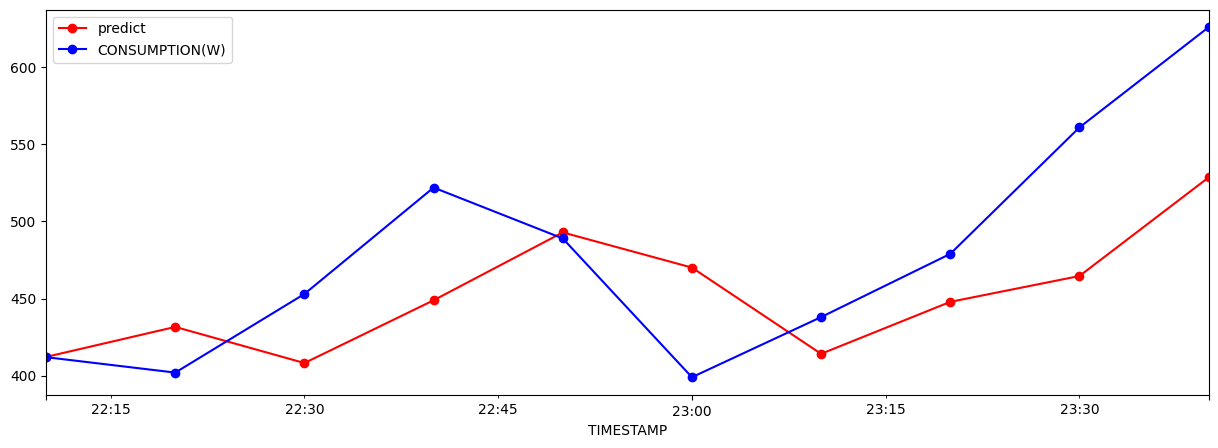

In [11]:
train_df = df_561_1
end_time = train_df.index[0] + (670-1) * datetime.timedelta(minutes=10)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=10) : end_time + 10 * datetime.timedelta(minutes=10)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

fcast = []
for row in valid.itertuples():
    f = model.predict(n_periods=1)[0]
    fcast.append(f)

    model.update(row[1])

mape = mean_absolute_percentage_error(valid.values, fcast)
print(mape)

fcast = pd.DataFrame({'predict':fcast}, index=valid.index)

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)    